# モデルのパラメータ数の確認

In [1]:
import yaml
import numpy as np
from torchinfo import summary
from modules import MyParT

2023-11-14 03:24:17.327957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dir_path = "./models/parT/GN1-MT/"

with open(dir_path + "config.yaml") as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
config["hyperparameters"]["model"]

{'activation': 'gelu',
 'block_params': None,
 'cls_block_params': {'activation_dropout': 0,
  'attn_dropout': 0,
  'dropout': 0},
 'embed_dims': [128, 512, 128],
 'fc_params': [],
 'for_inference': False,
 'num_classes': 3,
 'num_cls_layers': 2,
 'num_heads': 8,
 'num_layers': 8,
 'pair_embed_dims': [64, 64, 64],
 'pair_extra_dim': 3,
 'pair_input_dim': 0,
 'pf_input_dim': 22,
 'remove_self_pair': False,
 'trim': False,
 'use_amp': False,
 'use_pre_activation_pair': True}

In [4]:
model = MyParT.MyParTTaggerMultiTask(**config["hyperparameters"]["model"])

In [8]:
summary(model)

Layer (type:depth-idx)                                            Param #
MyParTTaggerMultiTask                                             --
├─SequenceTrimmer: 1-1                                            --
├─Embed: 1-2                                                      --
│    └─BatchNorm1d: 2-1                                           44
│    └─Sequential: 2-2                                            --
│    │    └─LayerNorm: 3-1                                        44
│    │    └─Linear: 3-2                                           2,944
│    │    └─GELU: 3-3                                             --
│    │    └─LayerNorm: 3-4                                        256
│    │    └─Linear: 3-5                                           66,048
│    │    └─GELU: 3-6                                             --
│    │    └─LayerNorm: 3-7                                        1,024
│    │    └─Linear: 3-8                                           65,664
│    │    └─GE

In [5]:
parameters = []
for i in range(13):
    config["hyperparameters"]["model"]["num_layers"] = i
    model = MyParT.MyParTTaggerMultiTask(**config["hyperparameters"]["model"])
    print(sum(p.numel() for p in model.parameters()))
    parameters.append(sum(p.numel() for p in model.parameters()))

648818
848506
1048194
1247882
1447570
1647258
1846946
2046634
2246322
2446010
2645698
2845386
3045074


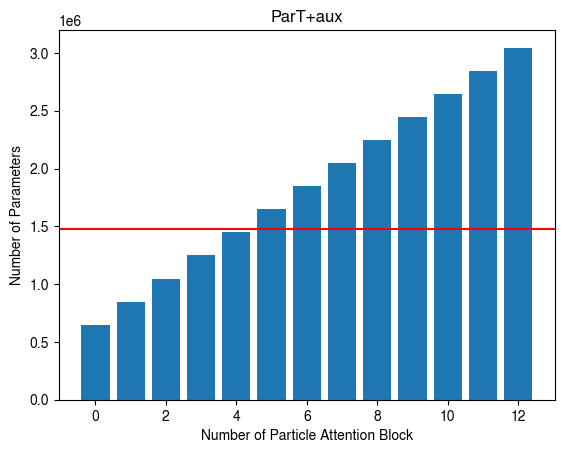

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
GN2_parameter = 1_474_413
GN1_parameter = 983_201
plt.bar(np.arange(13), parameters)
plt.xlabel("Number of Particle Attention Block")
plt.ylabel("Number of Parameters")
plt.title("ParT+aux")
# line
plt.axhline(y=GN2_parameter, color='r', linestyle='-')
plt.show()